# Activity 07
Abigail Stokes, Oct 25, 2023

## Import Packages

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from astropy.io import ascii
from sklearn.linear_model import LinearRegression
import seaborn as sns

data = pd.read_csv('Data_fundamental_Plane_kpc.csv')

## Visual Inspection of Data

In [227]:
data.head()


,ID,A_R,LogRe,mue,logSigma,eLogSigma,velocity,Type
0,2,0.180,0.613477,19.85,2.281,0.030,5473,-5
1,3,0.164,0.970785,20.17,2.409,0.020,5735,-5
2,4,0.171,0.400531,20.22,2.104,0.021,5640,-2
3,5,0.183,0.976549,20.30,2.397,0.020,6256,-5
4,6,0.190,0.814451,20.83,2.026,0.030,6183,-2


In [197]:
#filter to just elliptical

df = data[data['Type']<=-4]
df.head()

surf_bright = df['mue']
vel_disp = df['logSigma']
rad = df['LogRe']

surf_bright, vel_disp, rad = surf_bright.values, vel_disp.values, rad.values

print("Mean radius: ", np.average(rad))
print("Mean surface brightness: ", np.average(surf_bright))
print("Mean velocity dispersion: ", np.average(vel_disp))


Mean radius:  0.5706807731659357
Mean surface brightness:  19.523714285714284
Mean velocity dispersion:  2.283802380952381


## Data Cleaning and Plot Histograms

Slope:  [1.19044834] Intercept:  -2.1480679786146895


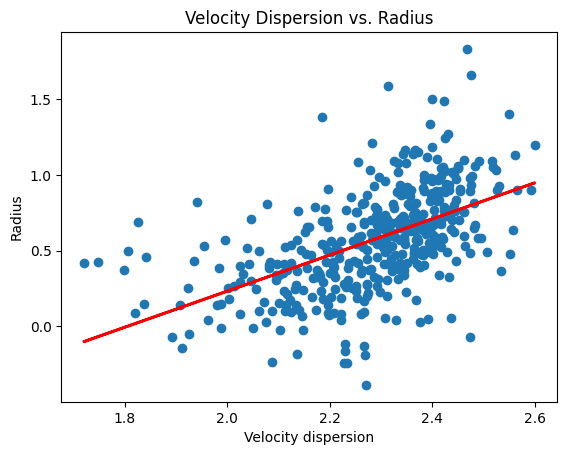

In [198]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


plt.scatter(vel_disp, rad, label="sampled data")
plt.title("Velocity Dispersion vs. Radius")
plt.xlabel('Velocity dispersion')
plt.ylabel('Radius')


linear_model = LinearRegression().fit(vel_disp.reshape(-1, 1), rad)
predict_line = linear_model.predict(vel_disp.reshape(-1, 1))

plt.plot(vel_disp, predict_line, label="regression line", lw=2.0, color="red")
print("Slope: ",linear_model.coef_, "Intercept: ",
linear_model.intercept_)



Slope:  [0.34223699] Intercept:  -6.11105653348124


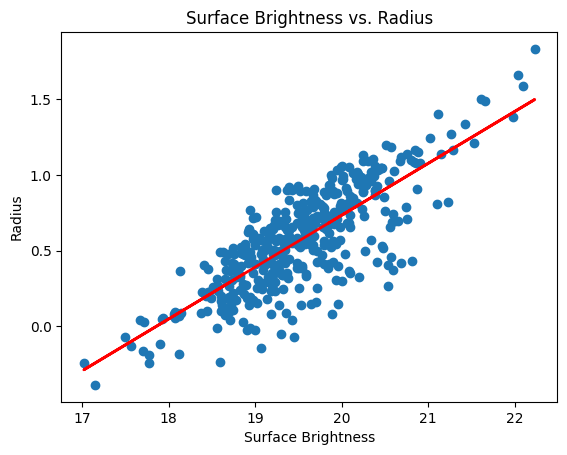

In [199]:
plt.scatter(surf_bright, rad, label="sampled data")
plt.title("Surface Brightness vs. Radius")
plt.xlabel('Surface Brightness')
plt.ylabel('Radius')


linear_model = LinearRegression().fit(surf_bright.reshape(-1,1), rad)
predict_line = linear_model.predict(surf_bright.reshape(-1,1))

plt.plot(surf_bright, predict_line, label="regression line", lw=2.0, color="red")
print("Slope: ",linear_model.coef_, "Intercept: ",
linear_model.intercept_)


In [200]:

X = np.matrix([np.ones(vel_disp.shape[0]), vel_disp, surf_bright]).T
print("Shape of X: ",X.shape)
X

Y = df['LogRe']
print("Shape of y: ", Y.shape)

beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
beta_hat = beta_hat.T
#lambda_hat = len(Y)/((Y-X*beta_hat).T*Y-X*beta_hat)

print('Beta:',beta_hat)

print(pred.shape)

Shape of X:  (420, 3)
Shape of y:  (420,)
Beta: [[-8.85214044]
 [ 1.1950541 ]
 [ 0.34284223]]
(420,)


Bayesian Inference Using Reference Prior

In [201]:
# Bayesian analysis with reference prior

from scipy.stats import gamma
from scipy.stats import multivariate_normal
pred = beta_hat[0,0] + beta_hat[1,0] * X[:,1] + beta_hat[2,0]*X[:,2]
pred = np.squeeze(np.asarray(pred))

res = (Y - pred)
sse = np.sum(res**2)

#parameters of the Gamma function
a_gamma = (len(Y) - 3)/2
b_gamma = sse/2
print(b_gamma)

n_real = 100000
lam_vector = np.zeros(n_real)
beta=np.zeros((n_real,3))

for j in range(n_real):
    lam_vector[j] = gamma.rvs(a_gamma, scale=1/b_gamma,size=1) #remember that scipy defines it this way
    s_beta = np.linalg.inv(lam_vector[j]*X.T.dot(X))
    beta[j,:]=multivariate_normal.rvs(mean=np.array([beta_hat[0,0],beta_hat[1,0],beta_hat[2,0]]), cov=s_beta, size=1)



1.9584967888244842


/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_60320/2089259663.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lam_vector[j] = gamma.rvs(a_gamma, scale=1/b_gamma,size=1) #remember that scipy defines it this way


## Plotting Posterior Distribution for Parameters

(array([1.55007922e-05, 3.10015844e-05, 4.65023766e-05, 1.24006338e-04,
        2.94515052e-04, 4.80524558e-04, 1.10055625e-03, 1.59658160e-03,
        2.68938745e-03, 4.03795637e-03, 6.60333747e-03, 9.79650066e-03,
        1.30206654e-02, 1.80971749e-02, 2.27009102e-02, 2.93042476e-02,
        3.48922832e-02, 4.08755890e-02, 4.63938710e-02, 4.93932743e-02,
        5.21679161e-02, 5.38807537e-02, 5.34312307e-02, 5.23461752e-02,
        4.91607624e-02, 4.44717728e-02, 3.86124733e-02, 3.23656541e-02,
        2.78549236e-02, 2.18328658e-02, 1.78801638e-02, 1.41754745e-02,
        1.02305228e-02, 7.53338500e-03, 5.65778915e-03, 4.23171627e-03,
        2.75139061e-03, 1.63533358e-03, 1.22456258e-03, 8.29292382e-04,
        4.49522974e-04, 3.33267032e-04, 2.24761487e-04, 1.08505545e-04,
        6.97535649e-05, 3.87519805e-05, 7.75039610e-06, 2.32511883e-05,
        0.00000000e+00, 1.55007922e-05]),
 array([ 77.91242482,  79.20268146,  80.4929381 ,  81.78319473,
         83.07345137,  84.3637

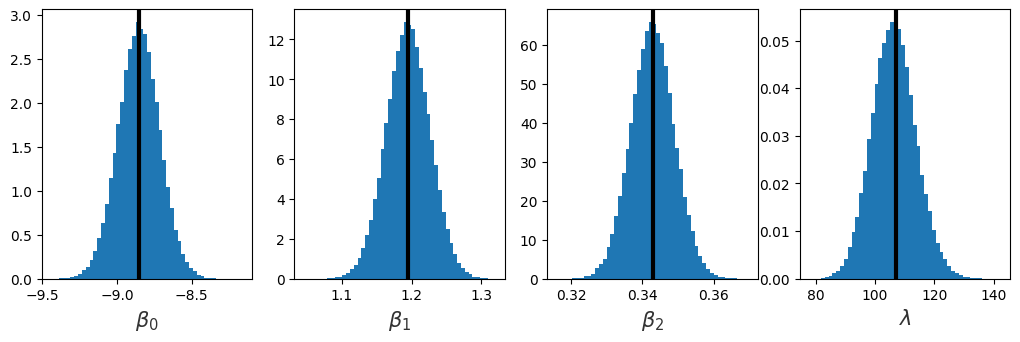

In [228]:
f, [ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(12.5, 3.5))

ax1.set_xlabel(r'$\beta_0$',fontsize=15,alpha=0.8)
ax2.set_xlabel(r'$\beta_1$',fontsize=15,alpha=0.8)
ax3.set_xlabel(r'$\beta_2$',fontsize=15,alpha=0.8)
ax4.set_xlabel(r'$\lambda$',fontsize=15,alpha=0.8)

ax1.axvline(beta_hat[0,0],label='MLE',lw=3,color='k')
ax2.axvline(beta_hat[1,0],label='MLE',lw=3,color='k')
ax3.axvline(beta_hat[2,0],label='MLE',lw=3,color='k')
ax4.axvline(len(Y)/np.sum(res**2),label='MLE',lw=3,color='k')

ax1.hist(beta[:,0],density=True,bins=50)
ax2.hist(beta[:,1],density=True,bins=50)
ax3.hist(beta[:,2],density=True,bins=50)
ax4.hist(lam_vector,density=True,bins=50)

## Printing Mean Parameter Values and Confidence Intervals

In [203]:
#Mean values
print('Beta_0              Beta_1             Beta_2              Lambda')
print(np.mean(beta[:,0]),np.mean(beta[:,1]),np.mean(beta[:,2]),np.mean(lam_vector))

Beta_0              Beta_1             Beta_2              Lambda
-8.852629791883192 1.1950703567355176 0.34286607710514594 106.44054347842226


In [204]:
# 90% Confidence intervals
print("CI for beta 0: (",(np.percentile(beta[:,0],5)), (np.percentile(beta[:,0],95)),")")
print("CI for beta 1: (",(np.percentile(beta[:,1],5)), (np.percentile(beta[:,1],95)),")")
print("CI for beta 2: (",(np.percentile(beta[:,2],5)), (np.percentile(beta[:,2],95)),")")
print("CI for Lambda: (",(np.percentile(lam_vector,5)), (np.percentile(lam_vector,95)),")")



CI for beta 0: ( -9.081264498595601 -8.625634649401597 )
CI for beta 1: ( 1.1437488196156802 1.2465240080141258 )
CI for beta 2: ( 0.33288268472273436 0.35290258707438565 )
CI for Lambda: ( 94.59178126479208 118.88912314158333 )


## Sensitivity Analysis
Compare results to MLE estimations

In [205]:
#Sensitivity Analysis: Compare to MLE estimations

new_Y = np.reshape(Y,(-1,1))
lambda_hat = len(Y)/((new_Y-X*beta_hat).T*new_Y-X*beta_hat)

print("Difference between MLE and Bayesian")
print("Beta_0",np.mean(beta[:,0] - beta_hat[0]))
print("Beta_1",np.mean(beta[:,1] - beta_hat[1]))
print("Beta_2",np.mean(beta[:,2] - beta_hat[2]))
print("Lambda: ", np.mean(lam_vector - lambda_hat))


Difference between MLE and Bayesian
Beta_0 -0.0004893482714151995
Beta_1 1.6258316282037736e-05
Beta_2 2.3843118001952436e-05
Lambda:  -20.314075110295114


In [206]:
# Using Bambi
import bambi as bmb

gauss_model = bmb.Model('LogRe ~ logSigma + mue', data=df)

In [217]:
gauss_fitted = gauss_model.fit(draws=10000, chains=1)
gauss_model.predict(gauss_fitted, kind="pps")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [LogRe_sigma, Intercept, logSigma, mue]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 3 seconds.


1.194926290276125 0.34284648533834966 -8.851936828557548


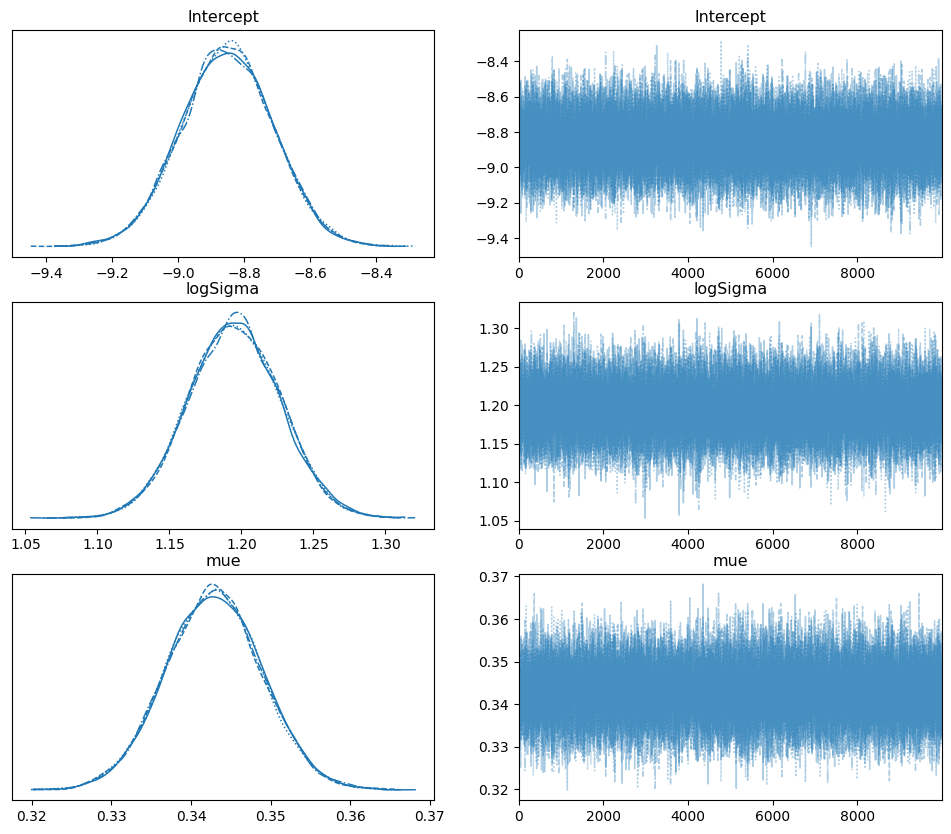

In [219]:
import arviz as az

az.plot_trace(gauss_fitted, var_names=["Intercept", "logSigma","mue"], figsize=(12,10))

print(gauss_fitted.posterior.logSigma.values.mean(),gauss_fitted.posterior.mue.values.mean(),gauss_fitted.posterior.Intercept.values.mean())